In [1]:
#讀黨
import numpy as np
x_train = np.loadtxt('x_train.csv', delimiter=',')
x_test = np.loadtxt('X_test.csv', delimiter=',')
y_train= np.loadtxt('y_train.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

(array([ 25.,  27.,  37.,  49.,  70.,  73.,  79.,  69.,  47.,  35.,   3.,
          3.,   1.,   1.,   1.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 15 Patch objects>)

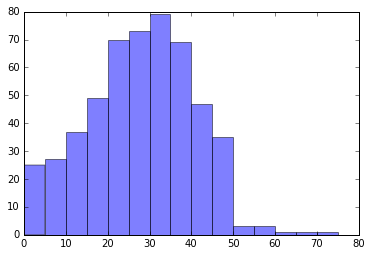

In [2]:
#開始觀察資料決定區間
%matplotlib inline
import matplotlib.pyplot as plt
bins = np.arange(0, 80,5)
plt.hist(y_train, bins = bins, alpha = 0.5)

In [3]:
np.average(y_train)

27.453846153846154

In [4]:
np.std(y_train)

12.728895981168526

In [5]:
#轉變Ｘ的型態
X = np.reshape(x_train,(520,15,1))#(x_train的個數, 15, 1)
X_test = np.reshape(x_test,(264,15,1))#(x_test的個數, 15, 1)

In [6]:
X

array([[[  23.],
        [  12.],
        [   6.],
        ..., 
        [   2.],
        [  11.],
        [   1.]],

       [[  24.],
        [   9.],
        [  18.],
        ..., 
        [   4.],
        [  79.],
        [   5.]],

       [[  25.],
        [ 105.],
        [ 357.],
        ..., 
        [  45.],
        [  71.],
        [ 136.]],

       ..., 
       [[  27.],
        [ 162.],
        [ 714.],
        ..., 
        [ 121.],
        [ 116.],
        [ 288.]],

       [[  28.],
        [ 161.],
        [ 701.],
        ..., 
        [ 107.],
        [ 154.],
        [ 370.]],

       [[  29.],
        [ 158.],
        [ 685.],
        ..., 
        [ 112.],
        [ 154.],
        [ 325.]]])

In [7]:
#輸出這邊我將資料分成群
y_train[y_train<15] = 0
y_train[(y_train>=15) & (y_train<25)] = 1
y_train[(y_train>=25) & (y_train<35)] = 2
y_train[(y_train>=35) & (y_train<45)] = 3
y_train[(y_train>=45)] = 4

In [8]:
y_test[y_test<15] = 0
y_test[(y_test>=15) & (y_test<25)] = 1
y_test[(y_test>=25) & (y_test<35)] = 2
y_test[(y_test>=35) & (y_test<45)] = 3
y_test[(y_test>=45)] = 4

In [9]:
len(y_train)

520

In [10]:
#將Ｙ轉換型態
from keras.utils import np_utils
y_train_trans = np_utils.to_categorical(y_train,5)
y_test_trans = np_utils.to_categorical(y_test,5)

Using TensorFlow backend.


In [26]:
from keras.models import Sequential
from keras.layers import Dense,Activation, LSTM, Dropout
from keras.optimizers import SGD
model = Sequential()
model.add(LSTM(256, activation="sigmoid", input_shape=(X.shape[1], X.shape[2]), recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(y_train_trans.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1285      
Total params: 265,477.0
Trainable params: 265,477.0
Non-trainable params: 0.0
_________________________________________________________________


In [31]:
model.fit(X, y_train_trans,batch_size=10, epochs=200, validation_data=(X_test, y_test_trans))

Train on 520 samples, validate on 264 samples
Epoch 1/200
520/520 [==============================] - 1s - loss: 1.3459 - acc: 0.3808 - val_loss: 1.4955 - val_acc: 0.2992
Epoch 2/200
520/520 [==============================] - 1s - loss: 1.3411 - acc: 0.4000 - val_loss: 1.5002 - val_acc: 0.3144
Epoch 3/200
520/520 [==============================] - 2s - loss: 1.3342 - acc: 0.4173 - val_loss: 1.6292 - val_acc: 0.2689
Epoch 4/200
520/520 [==============================] - 2s - loss: 1.3319 - acc: 0.3865 - val_loss: 1.5834 - val_acc: 0.2727
Epoch 5/200
520/520 [==============================] - 2s - loss: 1.3280 - acc: 0.4096 - val_loss: 1.5026 - val_acc: 0.2879
Epoch 6/200
520/520 [==============================] - 2s - loss: 1.3347 - acc: 0.4135 - val_loss: 1.5248 - val_acc: 0.2841
Epoch 7/200
520/520 [==============================] - 2s - loss: 1.3293 - acc: 0.3981 - val_loss: 1.4651 - val_acc: 0.3258
Epoch 8/200
520/520 [==============================] - 2s - loss: 1.3290 - acc: 0.3981

In [28]:
score = model.evaluate(X_test, y_test_trans, verbose=0)
score

[1.5596209692232537, 0.30681818181818182]

In [29]:
result = model.predict(X_test)

In [30]:
from ipywidgets import interact_manual
def identify(testnumber):
    print("神經網路判斷為：",result[testnumber])
    print("正確答案是:",y_test_trans[testnumber])
interact_manual(identify, testnumber=(0,44))

<function __main__.identify>